<a href="https://colab.research.google.com/github/olumideadekunle/Deep-Mind-Probability-Distribution/blob/main/Deep_Mind_Probability_Distribution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://storage.googleapis.com/dm-educational/assets/ai_foundations/GDM-Labs-banner-image-C1-white-bg.png">

## Lab: Create Your Own Probability Distribution



Explore the fundamentals of language models by predicting the next word in a given text prompt.

15 minutes

## Overview

In the previous activities, you have been introduced to language models. Fundamentally, a language model assigns a probability distribution to the next word for a given **context**. In later parts of this course, you will learn how you can build models that automatically compute these probability distributions. But before that, it is important that you get a sense of how these probability distributions are used to predict the next word.

In this lab, you will generate continuations for prompts by randomly choosing words from a probability distribution. A **prompt** is the input text provided to a language model. The goal is to assign probability values to a set of candidate words based on the context defined by the prompt. Then randomly choose from this list, a process known as **sampling**, to generate the next word. You will investigate how probabilities influence the generation of language and practice manipulating these probabilities to create sensible sentences. In doing so, you will mimick the basic principles of language models.

The prompt you will use throughout this course is "Jide was hungry so she went looking for." It is adapted from the prompt featured in Eldan and Li's 2023 paper [_TinyStories: How Small Can Language Models Be and Still Speak Coherent English?_](https://arxiv.org/pdf/2305.07759) [1].




### What you will learn:

By the end of this lab, you will understand:

* How probabilities influence the choice of the next word.
* How the context should determine the probability distribution over the next word.

### Tasks

**In this lab, you will**:
* Assign probabilities to each candidate word reflecting the likelihood of it being the appropriate next word given the prompt.
* Use the `random.choices` function with the assigned probabilities to sample a candidate word.
* Explore how altering the prompt (e.g., changing *hungry* to *thirsty* or modifying the subject) influences the probability distribution and the predicted next word.

All of these steps are described in detail in the following sections.

## How to use Google Colaboratory (Colab)

Google Colaboratory (also known as Google Colab) is a platform that allows you to run Python code in your browser. The code is written in **cells** that are excuted on a remote server.

To run a cell, hover over the cell and click on the `run` button to its left. The run button is the circle with the triangle (▶). Alternatively, you can also click on a cell and use the keyboard combination Ctrl+Return (or ⌘+Return if you are using a Mac).

To try this out, run the following cell. This should print today's day of the week below it.

In [1]:
from datetime import datetime

print(f"Today is {datetime.today():%A}.")

Today is Thursday.


Note that the *order in which you run the cells matters*. When you are working through a lab, make sure to always run *all* cells in order, otherwise the code might not work. If you take a break while working on a lab, Colab may disconnect you and in that case, you have to execute all cells again before  continuing your work. To make this easier, you can select the cell you are currently working on and then choose __Runtime → Run before__  from the menu above (or use the keyboard combination Ctrl/⌘ + F8). This will re-execute all cells before the current one.

## Imports

In this lab, you will make use of the `random` package to randomly pick elements from a probability distribution. All labs also use functions from the custom `ai_foundations` package that implements specific functionality for this course, such as automatic tests for verifying your answers.

Run the following cell to import the required packages.

In [2]:
%%capture
# Install the custom package for this course.
!pip install "git+https://github.com/google-deepmind/ai-foundations.git@main"

# Packages used.
# For randomly picking elements from a probability distribution.
import random
# Custom functions for providing feedback on your solutions.
from ai_foundations.feedback.course_1 import probabilities

## Assigning probabilities

In the following activities, you will assign probabilities to candidate words. Candidate words for a prompt are words that could serve as continuations for the prompt.

The cell below sets the probabilities for candidate words "star", "beef", "bottle" to complete the example prompt "Twinkle twinkle little". As you can see a high probability has been assigned to the word "star". This is to complete the prompt after the famous children's lullaby "Twinkle, Twinkle Little Star".

You do not have to modify anything in the following cell but go through it closely. The following activities will ask you to implement something very similar.

In [3]:
candidate_words = ["star", "beef", "bottle"]

# The probabilities for each word are defined in the following list.
your_mental_model = [0.99, 0.001, 0.009]

# This function runs several checks to verify that your_mental_model defines
# a proper probability distribution.
probabilities.test_probabilities(candidate_words, your_mental_model)

✅ You've set the probabilities successfully. Well done!


------
_Throughout the labs, you will see info boxes like this that provide you with background on how to use a function or explain key concepts. Make sure to familiarize yourself with the information in these boxes as you will need it to complete the following exercises._
> ℹ️ **Info: `random.choices`**
>
> The `random.choices` function allows you to select an item from a list based on specified weights. In this case, the candidate words (e.g. *star*, *beef*, *bottle*) will have probabilities (weights) that sum to 1. When you call `random.choices` with your list of words and their corresponding weights, it will randomly select a word according to these probabilities. For more details on the random.choices function, refer to [Python - random.choices method](https://www.geeksforgeeks.org/random-choices-method-in-python/).
------

<br />

The cell below completes the prompt based on the probabilities you assigned in the previous cell. Run the cell to complete the prompt.  

In [4]:
chosen_word = random.choices(candidate_words, weights=your_mental_model)

print(f"Twinkle twinkle little {chosen_word[0]}.")

Twinkle twinkle little star.


### Coding Activity 1: Assigning probabilities for a different prompt


Now you will repeat this process for another prompt, namely "Jide was hungry so she went looking for." The cell below already defines a list of words that serve as candidates for continuing this prompt: `["food", "snacks", "leftovers", "her", "for", "water", "photosynthesis", "pyramid"]`.

<br />

------
_Throughout the labs, you will see boxes like this that provide you with instructions on how to implement functionality. Follow the instructions closely and run the following cells once you are done._

> 💻 **Your task:**
>
> Enter probabilities for each candidate word for the variable `your_mental_model`. Follow the format introduced in the cell shown above.
>
>Note that
>1. your probabilities must add up to 1,
>2. all probabilities must be greater or equal to 0,
>3. you have to define a probability for each candidate word.
>
> Once you have entered your probabilities, run the cell.
------

In [7]:
candidate_words = [
    "food",
    "snacks",
    "leftovers",
    "her",
    "for",
    "water",
    "photosynthesis",
    "pyramid",
]

# Enter the probabilities for the candidate words to follow the
# prompt "Jide was hungry so she went looking for".
your_mental_model = [0.2, 0.346, 0.2, 0.09, 0.001, 0.16, 0.002, 0.001]

# This function runs several checks to verify that your_mental_model defines
# a proper probability distribution.
probabilities.test_probabilities(candidate_words, your_mental_model)

✅ You've set the probabilities successfully. Well done!


Now, use the `random.choices` function to select the candidate words. Run this cell multiple times, and observe which words are chosen more frequently. Notice how the sentence changes.

In [8]:
chosen_word = random.choices(candidate_words, weights=your_mental_model)

print(f"Jide was hungry so she went looking for {chosen_word[0]} ...")

Jide was hungry so she went looking for water ...


## Coding Activity 2: The importance of context

A good language model is sensitive to the given context. For example, if you are using a language model to build a chatbot, you want the model to generate answers that are relevant to the user's input rather than generating a response that talks about an irrelevant topic.

In the next activity, you will observe how a change in context should alter the probability distribution of the next word. Consider another prompt that is very similar to the prompt above: "Jide was thirsty so she went looking for."

With this context in mind, reassess the candidate words, and update your probability estimates. Reflect on how being *thirsty* might change the probabilities of the next possible words for this prompt. Compare it with the original prompt, in which Jide was *hungry*.


The list of candidate words is the same: "food", "snacks", "leftovers", "her", "for", "water", "photosynthesis", and "pyramid`.

<br />

------
> 💻 **Your task:**
>
> Assign new probabilities for the candidate words based on the new prompt. Make sure you define a proper probabilitiy distribution such that probabilities are non-negative and sum to 1.
>
> Once you have entered your probabilities, run the cell.
------

In [9]:
candidate_words = [
    "food",
    "snacks",
    "leftovers",
    "her",
    "for",
    "water",
    "photosynthesis",
    "pyramid",
]

# Enter the probabilities for the candidate words to follow the
# prompt "Jide was thirsty so she went looking for".
your_mental_model = []

# This function runs several checks to verify that your_mental_model defines
# a proper probability distribution.
probabilities.test_probabilities(candidate_words, your_mental_model)

Run the cell below and observe how the `random.choices` function completes the prompt with the new probabilities.

------
_Throughout the labs, you will see reflection boxes like this that provide you with some questions to think about. If you would like to write your thoughts down, you can either add cells to this Colab notebook or take notes on [Google Docs](https://docs.google.com/), [Notebook LM](https://notebooklm.google/), a piece of paper, or any other note-taking tool of your choice. For the reflection activities, you will not have to write any additional code._


> 💭 **Reflection:**
>
> Now, take a moment to reflect. For which words did you change the probabilities in the new context? Consider how modifying the prompt influenced your choice of probabilities. Which aspect of the new context made certain words stand out while others faded? Reflecting on the changes in the probability distribution that you applied can provide insights into how an ideal language model adjusts its word probabilities to generate **context-aware** responses.
------

## Summary

This is the end of the **Create Your Own Probability Distribution** lab.

This notebook explored fundamental concepts of language models, focusing on:

1. **Assigning probabilities:** You learned how to assign probabilities to candidate words based on a given prompt and you used the `random.choices` function to simulate word selection based on these probabilities. This highlighted the **stochastic** (or random) nature of language models, where word choices are guided by probabilities rather than always following the same generation process.

2. **The impact of context:** You observed how changing the context of a prompt significantly alters the probability distribution of candidate words. You did this by comparing the probabilities that you assigned for the candidate words for the prompts "Jide was hungry..." versus "Jide was thirsty...". This highlighted how context influences word choices. This is an important concept for building modern language models.



## Solutions

The following cells provide reference solutions to the coding activities above. If you really get stuck after trying to solve the activities yourself, you may want to consult these solutions.

We recommend that you *only* look at the solutions after you have tried to solve the activities above *multiple times*. The best way to learn challenging concepts in computer science and artifical intelligence is to debug your code piece-by-piece until it works rather than copying existing solutions.

If you feel stuck, you may want to first try to debug your code. For example, by adding additional print statements to see what your code is doing at every step. This will provide you with a much deeper understanding of the code and the materials. It will also provide you with practice on how to solve challenging coding problems beyond this course.

To view the solutions for an activity, click on the arrow to the left of the activity name. If you consult the solutions, do not copy and paste them into the cells above. Instead, look at them and then type them manually into the cell. This will help you understand where you went wrong.

## References
# Credit To
[1] Ronen Eldan and Yuanzhi Li. 2023. Tiny Stories: How Small Can Language Models Be and Still Speak Coherent English. arXiv:2305.07759. Retrieved from [https://arxiv.org/pdf/2305.07759](https://arxiv.org/pdf/2305.07759).


# 🚀 Exploring Language Models: My Journey with Probability Distributions

## 👋 Hey There!

Welcome to my hands-on exploration of a fundamental concept behind Large Language Models (LLMs): **probability distributions for next-word prediction!** This project is a direct result of diving deep into how these incredible models "think" about what word comes next. It's been a fascinating journey to see how seemingly simple probabilities can lead to coherent (and sometimes amusing!) text generation.

## 🌟 Project Overview

In this interactive Colab notebook, I've mimicked a core mechanism of language models: predicting the next word in a given text prompt. My goal was to understand how a language model assigns probabilities to a set of candidate words based on the surrounding **context**, and then uses these probabilities to *sample* (randomly choose) the next word.

The main prompt I worked with was: "Jide was hungry so she went looking for..." (and its variation: "Jide was thirsty so she went looking for..."). This lab really opened my eyes to the subtle power of context!

## ✨ What I Explored & Learned:

*   **Assigning Probabilities:** I got hands-on with assigning probability values to different candidate words. It was interesting to manually adjust these likelihoods to reflect what I thought was most appropriate based on the prompt.
*   **Stochastic Nature of Generation:** Using Python's `random.choices` function, I saw how a language model doesn't just pick the *most likely* word every time, but rather samples from the distribution. Running the cell multiple times often yielded different, yet plausible, continuations.
*   **The Power of Context:** This was a huge takeaway! I actively manipulated probability distributions based on changes in the prompt's context (e.g., changing "hungry" to "thirsty"). This clearly demonstrated how an effective language model *must* be context-aware to generate relevant responses.

## 📊 Visualizing Context-Awareness

One of the coolest parts of this project was creating a visualization to show the impact of context. I generated a bar chart comparing the probability distributions of candidate words when Jide was 'hungry' versus when she was 'thirsty'. This chart vividly illustrates:

*   How the probability of 'water' dramatically increased when Jide was 'thirsty'.
*   How the probabilities for 'food'-related words decreased in the 'thirsty' context.

This visualization truly makes the abstract concept of "context-awareness" tangible and is a highlight of my presentation!

## 🛠️ Technologies Used

*   **Python:** The core programming language.
*   **Google Colaboratory:** For an interactive coding environment.
*   **`random` library:** For sampling words based on probabilities.
*   **`matplotlib` & `pandas`:** For data visualization and manipulation.

## 🏃‍♀️ How to Run the Notebook

1.  **Open in Colab:** Click on the "Open in Colab" badge (if this README is part of a Colab notebook, you're already here!).
2.  **Run Cells in Order:** Execute each code cell sequentially. This will guide you through assigning probabilities, generating words, and finally, creating the comparative visualization.

## 💡 Future Ideas & Enhancements

This project sparked several ideas for further exploration:

*   **Sequential Word Generation:** Extend the model to generate not just one, but a sequence of words, building upon each generated word to form a more complete sentence.
*   **More Complex Contexts:** Experiment with prompts that require more nuanced probabilistic adjustments.
*   **Quantitative Evaluation:** Explore ways to quantitatively evaluate the "sensibleness" or "coherence" of generated text.

I'm excited about the possibilities and look forward to diving deeper into these concepts!

## 🙏 Acknowledgments

This lab is adapted from the concepts presented in Eldan and Li's 2023 paper [_TinyStories: How Small Can Language Models Be and Still Speak Coherent English?_](https://arxiv.org/pdf/2305.07759). Big thanks to the creators of this educational material for providing such a clear and engaging introduction to language models!

In [13]:
candidate_words = [
    "food",
    "snacks",
    "leftovers",
    "her",
    "for",
    "water",
    "photosynthesis",
    "pyramid",
]

# Enter the probabilities for the candidate words to follow the
# prompt "Jide was thirsty so she went looking for".
your_mental_model = [0.05, 0.046, 0.09, 0.05, 0.001, 0.76, 0.002, 0.001]

# This function runs several checks to verify that your_mental_model defines
# a proper probability distribution.
probabilities.test_probabilities(candidate_words, your_mental_model)

✅ You've set the probabilities successfully. Well done!


In [14]:
chosen_word = random.choices(candidate_words, weights=your_mental_model)

print(f"Jide was thirsty so she went looking for {chosen_word[0]} ...")

Jide was thirsty so she went looking for water ...


### Visualizing Probability Distributions for Different Contexts

To make your project presentation more impactful, let's visualize how the probability distributions change based on the context. Below is a bar chart comparing the probabilities of candidate words when Jide is 'hungry' versus when Jide is 'thirsty'. This clearly demonstrates the importance of context in language modeling.

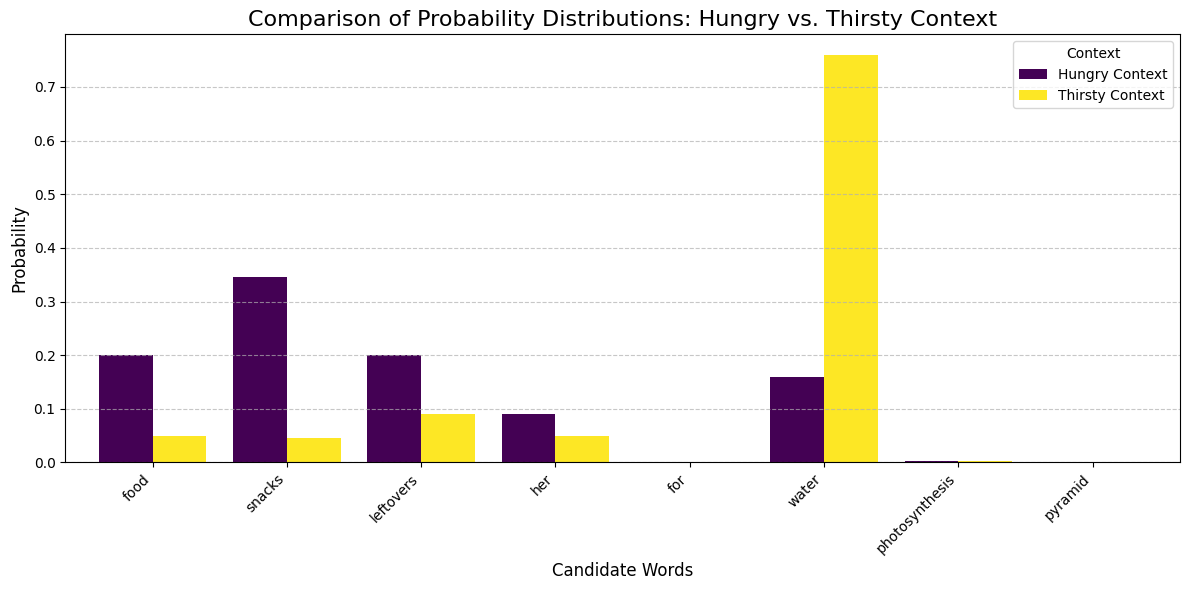

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Candidate words (same for both contexts)
candidate_words = [
    "food",
    "snacks",
    "leftovers",
    "her",
    "for",
    "water",
    "photosynthesis",
    "pyramid",
]

# Probabilities for 'hungry' context (from Coding Activity 1)
probabilities_hungry = [0.2, 0.346, 0.2, 0.09, 0.001, 0.16, 0.002, 0.001]

# Probabilities for 'thirsty' context (from Coding Activity 2 solution)
probabilities_thirsty = [0.05, 0.046, 0.09, 0.05, 0.001, 0.76, 0.002, 0.001]

# Create a DataFrame for easier plotting
df_probs = pd.DataFrame({
    'Word': candidate_words,
    'Hungry Context': probabilities_hungry,
    'Thirsty Context': probabilities_thirsty
})

# Set the index to 'Word' for plotting
df_probs = df_probs.set_index('Word')

# Plotting the comparison
fig, ax = plt.subplots(figsize=(12, 6))
df_probs.plot(kind='bar', ax=ax, width=0.8, colormap='viridis')

ax.set_title('Comparison of Probability Distributions: Hungry vs. Thirsty Context', fontsize=16)
ax.set_xlabel('Candidate Words', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.legend(title='Context', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This visualization clearly shows how the probability for 'water' significantly increases when Jide is 'thirsty', while probabilities for 'food'-related words decrease. This is a powerful way to demonstrate the concept of context-awareness in language models in your presentation.